In [1]:
import sys, os
sys.path.append(os.path.realpath(".."))

import util_funcs
from importlib import reload
reload(util_funcs)
from copy import deepcopy as cp

import data_reader as read
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import pywt
import tsfresh.feature_extraction.feature_calculators as feats
import constants
import clinical_text_analysis as cta
reload(cta)
import tsfresh
import ensembleReader as er
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, r2_score
from os import path

reload(read)
import wf_analysis.datasets as wfdata
import wf_analysis.filters as filt
reload(filt)
from addict import Dict
import time
import pickle as pkl
import tsfresh.feature_extraction.feature_calculators as tsf
import pyedflib as edf
import keras_models.dataGen as dg 

Using TensorFlow backend.


In [2]:
from keras.models import load_model

In [3]:
model = load_model("/n/scratch2/ms994/out/OTHTYMOOILEALOIM.h5")

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/home/ms994/miniconda3/envs/keras-redo/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1000, 21, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1000, 21, 4)  68          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 500, 21, 4)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 500, 21, 4)   16          max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_2 (

In [5]:
test_edss = pkl.load(open("/n/scratch2/ms994/test_multiple_labels_sessions_seizure_data_4.pkl", "rb"))
test_seizure_labels = [datum[1][0] for datum in test_edss]
test_session_labels = [datum[1][1] for datum in test_edss]
test_subtype_labels = [datum[1][2] for datum in test_edss]


In [6]:
test_seizure_labels[0]

False

In [7]:
test_edg = dg.DataGenMultipleLabels(test_edss, xy_tuple_form=False, precache=True, num_labels=2, labels=[test_seizure_labels, test_subtype_labels], shuffle=False, batch_size=512, n_classes=[2, 11])


In [8]:
test_edg[0]

(array([[[[-2.74984618e-01],
          [-5.03682458e-01],
          [-1.53816678e-02],
          ...,
          [ 3.55479694e-01],
          [ 7.41793598e-01],
          [-1.45183139e-01]],
 
         [[-1.94639727e+00],
          [-2.99914502e+00],
          [-1.90416795e-01],
          ...,
          [ 2.09516847e+00],
          [ 5.24539489e+00],
          [-8.95338386e-01]],
 
         [[-5.89382397e+00],
          [-7.06159693e+00],
          [-9.12675503e-01],
          ...,
          [ 5.12066200e+00],
          [ 1.65775646e+01],
          [-2.33252260e+00]],
 
         ...,
 
         [[-1.54814546e+01],
          [-1.51913161e+01],
          [ 1.78922163e+00],
          ...,
          [-3.78520039e+00],
          [-1.46286671e+01],
          [-2.39485638e+01]],
 
         [[-1.80479270e+01],
          [-1.73302179e+01],
          [ 2.44939421e+00],
          ...,
          [-9.60268008e+00],
          [-1.54674672e+01],
          [-2.33075982e+01]],
 
         [[-1.99131498e+

In [9]:
pred = model.predict_generator(test_edg)

In [10]:
len(pred[0])

55345

In [11]:
seiz_pred = pred[0]

In [12]:
from sklearn.metrics import classification_report

In [13]:
seiz_pred[0]

array([0.5381996 , 0.46180043], dtype=float32)

In [20]:
sens = []
spec = []

for i in range(1000):
    clr = classification_report(test_seizure_labels, seiz_pred[:,0]<(i*1.0/1000), output_dict=True)
    spec.append(clr['False']["recall"])
    sens.append(clr['True']["recall"])    

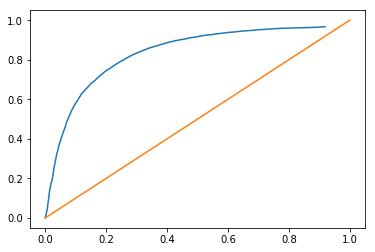

In [23]:
plt.plot([1 -s for s in spec], sens, )
plt.plot((0,1),[0,1])

In [24]:
from sklearn.metrics import roc_curve

In [30]:
res = roc_curve(test_seizure_labels, seiz_pred[:,1])

Text(0.5, 1.0, 'AUC-ROC Curve for Random Rescale(1.5) and Random Rearrange')

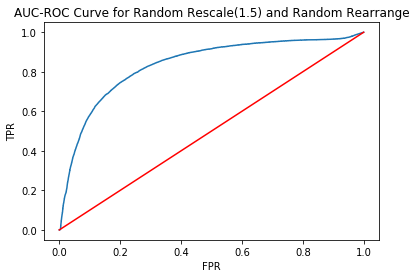

In [40]:
plt.plot(res[0], res[1])
plt.plot([0,1],[0,1], "r")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC Curve for Random Rescale(1.5) and Random Rearrange")

In [ ]:
model = load_model("/n/scratch2/ms994/out/XNOORNSEJYQOHMPI.h5")